#### Srinivasaragavan Vijayaraghavan 
#### Vishal Yadav


## Introduction
This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 

## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

 

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

 

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 

 

When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

In [12]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 5000)


### Reading the Dataset 

In [13]:
#Read the data in a dataframe
inp1= pd.read_csv(r'G:\Upgrad_Python\JupyterNotebooks\Case Study_Credit EDA\Data\previous_application.csv')
inp2= pd.read_csv(r'G:\Upgrad_Python\JupyterNotebooks\Case Study_Credit EDA\Data\application_data.csv')
cols_data= pd.read_csv(r'G:\Upgrad_Python\JupyterNotebooks\Case Study_Credit EDA\Data\columns_description.csv',encoding= 'unicode_escape')



### Let's see the Columns description first.

In [14]:
cols_data.head()

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [15]:
cols_data.rename(columns = {'Unnamed: 0':'Serial No'}, inplace = True) 
cols_data.set_index('Serial No')


,Table,Row,Description,Special
Serial No,,,,
1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_data,CODE_GENDER,Gender of the client,NaN
7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_data,CNT_CHILDREN,Number of children the client has,NaN
10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_data,AMT_CREDIT,Credit amount of the loan,NaN


#### Now we have the descriptions for the columns in each datasets that we have. Time for exploring the Data to infer insights

### Exploring the  Application Data Which is current data given 

In [16]:
# To know the Shape of the Dataset we are going to explore
inp2.shape

(307511, 122)

In [17]:
#Lets, now see the columns we have and their dataypes and stats 
inp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [18]:
#View sample data to see how the data set look like 
inp2.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [19]:
inp2.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [20]:
# Cleaning the data 
# Exlpore for null values 
nullcolumns=inp2.isnull().sum()
nullcolumns

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [21]:
# To find the percentage of null values in the above columns we have the null counts displayed 
##To find the columns having more than 50% null values 
nullcolumns=inp2.isnull().sum()
nullcolumns=nullcolumns[nullcolumns.values>(0.5*len(nullcolumns))]
nullcolumns

AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
OWN_CAR_AGE                     202929
OCCUPATION_TYPE                  96391
EXT_SOURCE_1                    173378
EXT_SOURCE_2                       660
EXT_SOURCE_3                     60965
APARTMENTS_AVG                  156061
BASEMENTAREA_AVG                179943
YEARS_BEGINEXPLUATATION_AVG     150007
YEARS_BUILD_AVG                 204488
COMMONAREA_AVG                  214865
ELEVATORS_AVG                   163891
ENTRANCES_AVG                   154828
FLOORSMAX_AVG                   153020
FLOORSMIN_AVG                   208642
LANDAREA_AVG                    182590
LIVINGAPARTMENTS_AVG            210199
LIVINGAREA_AVG                  154350
NONLIVINGAPARTMENTS_AVG         213514
NONLIVINGAREA_AVG               169682
APARTMENTS_MODE                 156061
BASEMENTAREA_MODE               179943
YEARS_BEGINEXPLUATATION_MODE    150007
YEARS_BUILD_MODE                204488
COMMONAREA_MODE          

In [22]:
#Drop the Null values 

nullcolumns = list(nullcolumns[nullcolumns.values>=0.3].index)
inp2.drop(labels=nullcolumns,axis=1,inplace=True)
print(len(nullcolumns))

64


In [23]:
#Check for percantage of null values again to ensure we have no NaN's in data set 

print((100*(inp2.isnull().sum()/len(inp2))))

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


 We, could see that AMT_ANNUITY column has few null values,hence it will be imputed

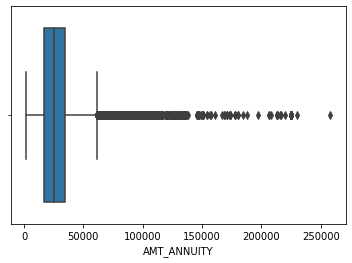

<Figure size 432x288 with 0 Axes>

In [24]:
#Box Plot check for Outliers 
sns.boxplot(inp2.AMT_ANNUITY)
plt.show()
plt.savefig('sample.jpg')

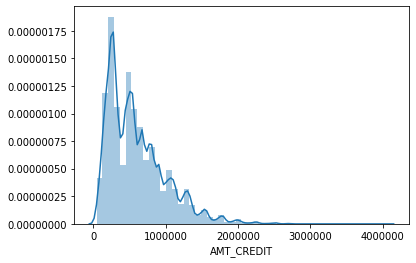

In [25]:
#Plot to see outliers in AMT_CREDIT 
sns.distplot(inp2.AMT_CREDIT)
plt.show()

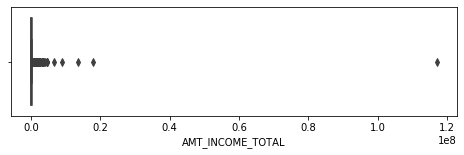

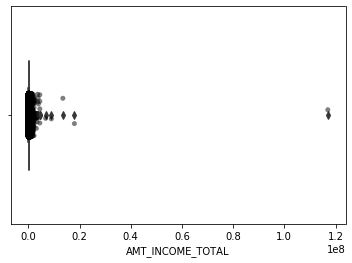

In [26]:
#Plot to see outliers in AMT_INCOME_TOTAL 
plt.figure(figsize=[8,2])
sns.boxplot(inp2.AMT_INCOME_TOTAL)
plt.show()

# make boxplot with Seaborn
bplot=sns.boxplot(inp2.AMT_INCOME_TOTAL, 
                 width=0.5,
                 palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(inp2.AMT_INCOME_TOTAL,  
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')


#### from the box plot we could see that the Field/ Column has more outiers. So, Instead of imputing through mean, the field will be imputed with median . Since, we have outliers

In [27]:
#To find the median for the fiel AMT_ANNUITY
values=inp2['AMT_ANNUITY'].median()

values

24903.0

In [28]:
# Fill the above value 24903 for all the missing values in AMT_ANNUITY
inp2.loc[inp2['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [29]:
#Check for percantage of null values again to ensure we have no NaN's in data set 

print((100*(inp2.isnull().sum()/len(inp2))))

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


In [30]:

# Removing rows having null values greater than or equal to 50%

nullrows=inp2.isnull().sum(axis=1)
nullrows=list(nullrows[nullrows.values>=0.5*len(inp2)].index)
inp2.drop(labels=nullrows,axis=0,inplace=True)
print(len(nullrows))

0


In [31]:
#To Check the dataype of all the columns 
inp2.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,1,1,1,1,1,0,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,1,1,0,1,1,0,3.0,2,2,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,-1562.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,1,1,1,1,0,0,2.0,3,3,MONDAY,16,0,0,0,0,1,1,Other,-1070.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,1,1,0,1,0,0,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

inp2.drop(labels=unwanted,axis=1,inplace=True)

In [33]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_EDUCATION_TYPE          307511 non-null  object 
 12  NAME_FAMILY_STATUS           307511 non-null  object 
 13 

In [34]:
#view Sample data frame 
inp2.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,WEDNESDAY,16,0,0,0,0,0,0,Other
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,Commercial associate,Higher education,Married,House / apartment,0.035792,-13778,-3130,-1213.0,-619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449,-4597.0,-2379,MONDAY,16,0,0,0,0,1,1,Other
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,WEDNESDAY,14,0,0,0,0,0,0,XNA
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,THURSDAY,8,0,0,0,0,0,0,Electricity


From the analysis of the head above, we could see the DAYS colum have the value as negative and the ORganization Type colum have XNA value . So, the Next step is to check for XNA for the variables and the -ve values need to be +ve converted for days column

In [35]:
#To handle -ve values in the DAYS columns in the inp2 Dataframe
inp2 = inp2.apply(lambda x: x*-1 if x.name in ['DAYS_BIRTH', 'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'] else x)
inp2.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,WEDNESDAY,16,0,0,0,0,0,0,Other
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.0,2379,MONDAY,16,0,0,0,0,1,1,Other
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,20099,-365243,7427.0,3514,WEDNESDAY,14,0,0,0,0,0,0,XNA
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,14469,2019,14437.0,3992,THURSDAY,8,0,0,0,0,0,0,Electricity


In [36]:
inpsample=inp2.head(10)

In [37]:
#inp2.drop([Current_Date],axis=1,inplace=True)
#inp2['date_only'] = inp2['Current_date'].dt.date
#inp2.head(10)
#inp2.drop(['Current_Date'], axis = 1,inplace=True) 

In [38]:
#Add CurrentDate value to Data frame inp2
inp2['Current_date'] = pd.to_datetime('today',utc=False)
inp2['Current_date'] = inp2['Current_date'].dt.date

In [39]:
inp2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Current_date
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2020-06-22
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,2020-06-22
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,2020-06-22
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2020-06-22
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,2020-06-22


### Handling missing values(XNA)- Not Available  in the inp2 Dataframe based on the suitable techniques


In [40]:
#Categorical columns having these 'XNA' values
    
#CODE_GENDER 
inp2[inp2['CODE_GENDER']=='XNA'].shape

(4, 29)

In [41]:
# Organization column

inp2[inp2['ORGANIZATION_TYPE']=='XNA'].shape

(55374, 29)

So, there are 4 rows from Gender column and 55374 rows from Organization type column

In [42]:
# Describing the Gender column to check the number of females and males

inp2['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Since, Female is having the majority and only 4 rows are having XNA values, we can update those columns with Gender 'F'.

In [43]:
# Updating the column 'CODE_GENDER' with "F" for the dataset

inp2.loc[inp2['CODE_GENDER']=='XNA','CODE_GENDER']='F'
inp2['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [44]:
# Describing the organization type column

inp2['ORGANIZATION_TYPE'].describe()

count                     307511
unique                        58
top       Business Entity Type 3
freq                       67992
Name: ORGANIZATION_TYPE, dtype: object

we have total count of 307511 rows of which 55374 rows are having 'XNA' values. Which means 18% of the column is having this values. Hence if we drop the rows of total 55374, will not have any major impact on our dataset.

In [45]:
# Hence, dropping the rows of total 55374 have 'XNA' values in the organization type column

inp2=inp2.drop(inp2.loc[inp2['ORGANIZATION_TYPE']=='XNA'].index)
inp2[inp2['ORGANIZATION_TYPE']=='XNA'].shape

(0, 29)

In [46]:

# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

inp2[numeric_columns]=inp2[numeric_columns].apply(pd.to_numeric)

inp2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Current_date
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2020-06-22
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,2020-06-22
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,2020-06-22
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2020-06-22
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,2020-06-22


In [47]:
inp2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252137 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   252137 non-null  int64  
 1   TARGET                       252137 non-null  int64  
 2   NAME_CONTRACT_TYPE           252137 non-null  object 
 3   CODE_GENDER                  252137 non-null  object 
 4   FLAG_OWN_CAR                 252137 non-null  object 
 5   FLAG_OWN_REALTY              252137 non-null  object 
 6   CNT_CHILDREN                 252137 non-null  int64  
 7   AMT_INCOME_TOTAL             252137 non-null  float64
 8   AMT_CREDIT                   252137 non-null  float64
 9   AMT_ANNUITY                  252137 non-null  float64
 10  NAME_INCOME_TYPE             252137 non-null  object 
 11  NAME_EDUCATION_TYPE          252137 non-null  object 
 12  NAME_FAMILY_STATUS           252137 non-null  object 
 13 

### To Create Bins for AMT_INCOME_TOTAL ,AMT_CREDIT,AMT_ANNUITY


In [48]:
#These Bins are created to explore insights by cutting the amounts into specific class intervals 
#Creating bins for income amount

bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

inp2['AMT_INCOME_RANGE']=pd.cut(inp2['AMT_INCOME_TOTAL'],bins,labels=slot)

In [49]:
# Creating bins for Credit amount

bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

inp2['AMT_CREDIT_RANGE']=pd.cut(inp2['AMT_CREDIT'],bins=bins,labels=slots)

In [50]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0=inp2.loc[inp2["TARGET"]==0]
target1=inp2.loc[inp2["TARGET"]==1]

In [51]:
target0.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Current_date,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,2020-06-22,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,2020-06-22,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,2020-06-22,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,State servant,Secondary / secondary special,Married,House / apartment,0.035792,16941,1588,4970.0,477,WEDNESDAY,16,0,0,0,0,0,0,Other,2020-06-22,"75000,100000",450000-500000
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,Commercial associate,Higher education,Married,House / apartment,0.035792,13778,3130,1213.0,619,SUNDAY,16,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,150000-175000,900000 and above
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,State servant,Higher education,Married,House / apartment,0.003122,18850,449,4597.0,2379,MONDAY,16,0,0,0,0,1,1,Other,2020-06-22,350000-375000,900000 and above
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,14469,2019,14437.0,3992,THURSDAY,8,0,0,0,0,0,0,Electricity,2020-06-22,125000-150000,400000-450000
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,Working,Higher education,Married,House / apartment,0.022800,10197,679,4427.0,738,SATURDAY,15,0,0,0,0,0,0,Medicine,2020-06-22,100000-125000,650000-700000
12,100016,0,Cash loans,F,N,Y,0,67500.0,80865.0,5881.5,Working,Secondary / secondary special,Married,House / apartment,0.031329,13439,2717,311.0,3227,FRIDAY,10,0,0,0,0,0,0,Business Entity Type 2,2020-06-22,50000-75000,0-150000


In [52]:
target1.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Current_date,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,200000-225000,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,Working,Secondary / secondary special,Widow,House / apartment,0.018029,18724,2628,6573.0,1827,MONDAY,9,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,100000-125000,900000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.025164,17482,1262,1182.0,1029,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,200000-225000,900000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,Working,Secondary / secondary special,Civil marriage,House / apartment,0.007305,13384,3597,45.0,4409,THURSDAY,11,0,0,0,0,0,0,Self-employed,2020-06-22,125000-150000,250000-300000
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,Commercial associate,Incomplete higher,Single / not married,With parents,0.030755,10199,2015,4802.0,1038,SUNDAY,13,0,0,0,0,1,1,Industry: type 4,2020-06-22,300000-325000,900000 and above
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,Commercial associate,Incomplete higher,Separated,House / apartment,0.007274,10526,267,387.0,3190,SUNDAY,12,0,1,1,0,1,1,Trade: type 2,2020-06-22,150000-175000,700000-750000
138,100160,1,Cash loans,M,N,Y,0,292500.0,675000.0,36747.0,Working,Higher education,Married,House / apartment,0.035792,16667,200,5239.0,114,FRIDAY,18,1,1,0,1,1,0,Business Entity Type 3,2020-06-22,275000-300000,650000-700000
154,100181,1,Cash loans,F,N,Y,0,157500.0,245619.0,12667.5,Working,Secondary / secondary special,Single / not married,House / apartment,0.022625,17538,7676,774.0,1082,TUESDAY,9,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,150000-175000,200000-250000
163,100192,1,Cash loans,F,N,N,0,111915.0,225000.0,21037.5,Commercial associate,Secondary / secondary special,Single / not married,With parents,0.018801,7989,150,2570.0,646,FRIDAY,16,0,0,0,0,1,1,Trade: type 3,2020-06-22,100000-125000,200000-250000
180,100209,1,Revolving loans,M,N,Y,3,180000.0,540000.0,27000.0,Commercial associate,Higher education,Married,House / apartment,0.024610,15326,1038,782.0,792,THURSDAY,18,0,0,0,0,0,0,Construction,2020-06-22,175000-200000,500000-550000


In [53]:

# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0)/len(target1),2)

10.55

##### We have, now found out that the Imbalance Ratio is 10.055

## Univariate analysis for categories for Target - 0 ( Client with no payment difficulites )

In [54]:
# Count plotting in logarithmic scale

def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

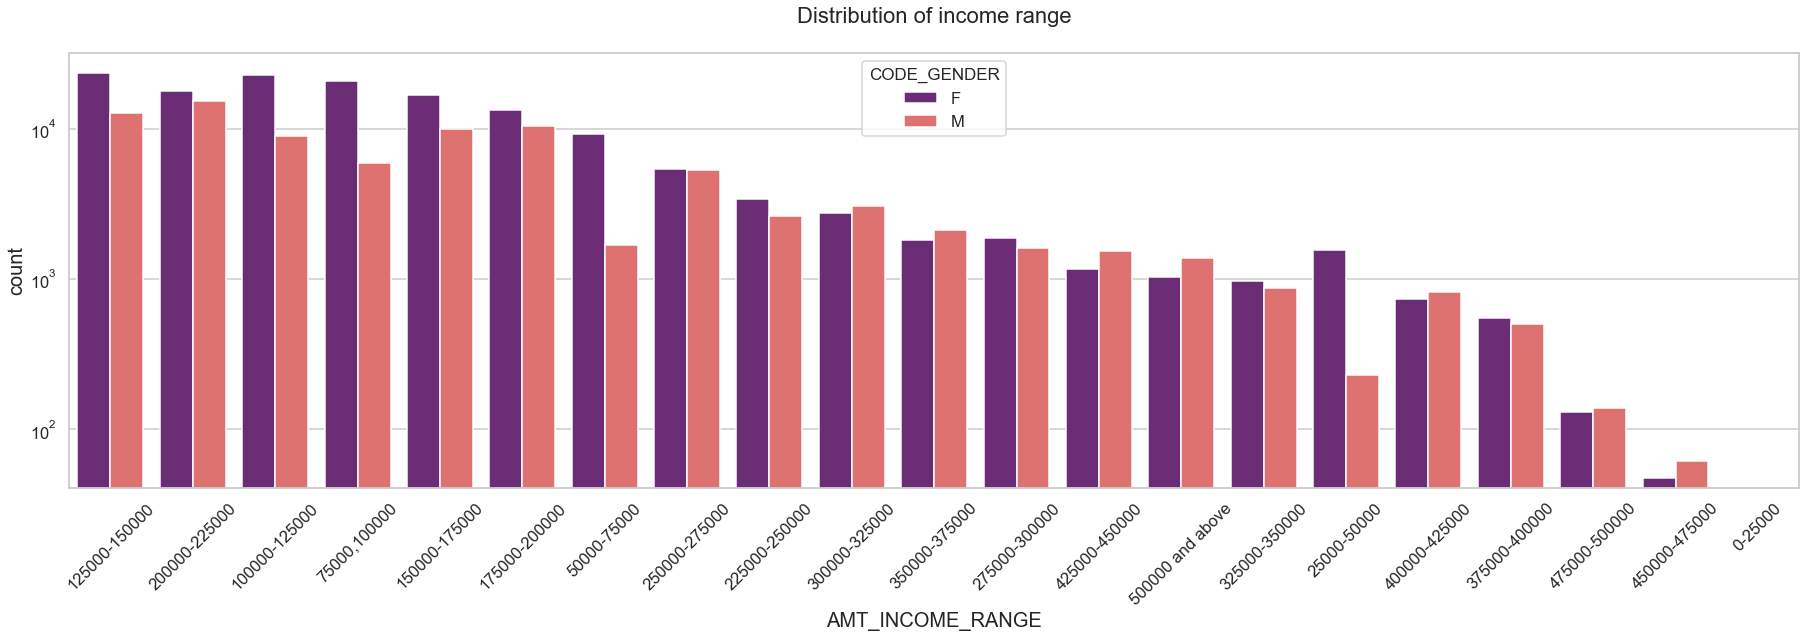

In [55]:
# PLotting for income range

uniplot(target0,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Inferences and insights from the above Plot :

Female counts are higher than male.

Income range from 100000 to 200000 is having more number of credits.

This graph show that females are more than male in having credits for that range.

Very less count for income range 400000 and above.

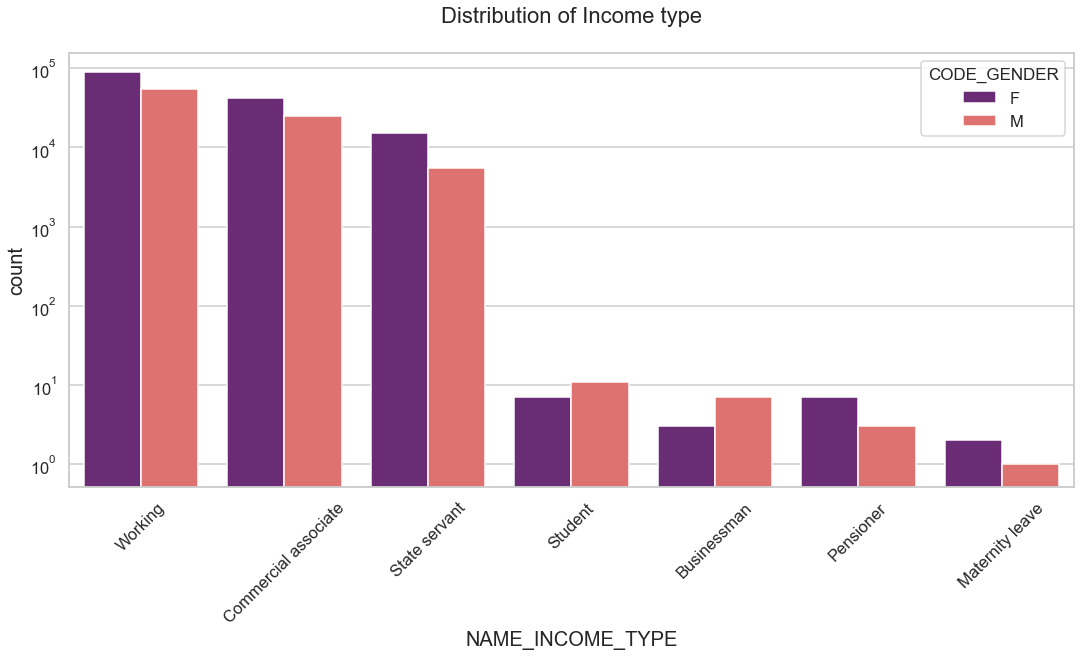

In [56]:
# Plotting for Income type

uniplot(target0,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Inisghts Derived from the above plot : 


For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
For this Females are having more number of credits than male.
Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

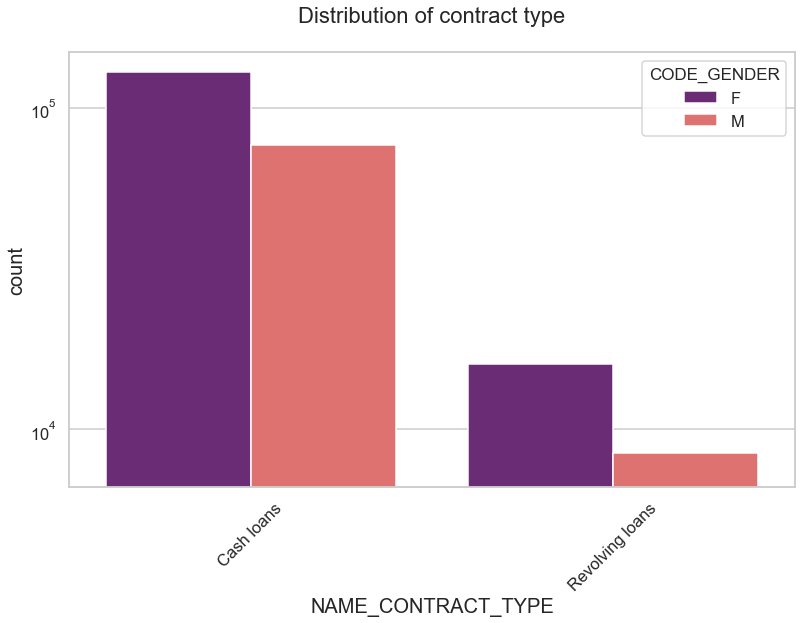

In [57]:

# Plotting for Contract type

uniplot(target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Inisghts Derived from the above plot :

For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.

Female is leading for applying credits.

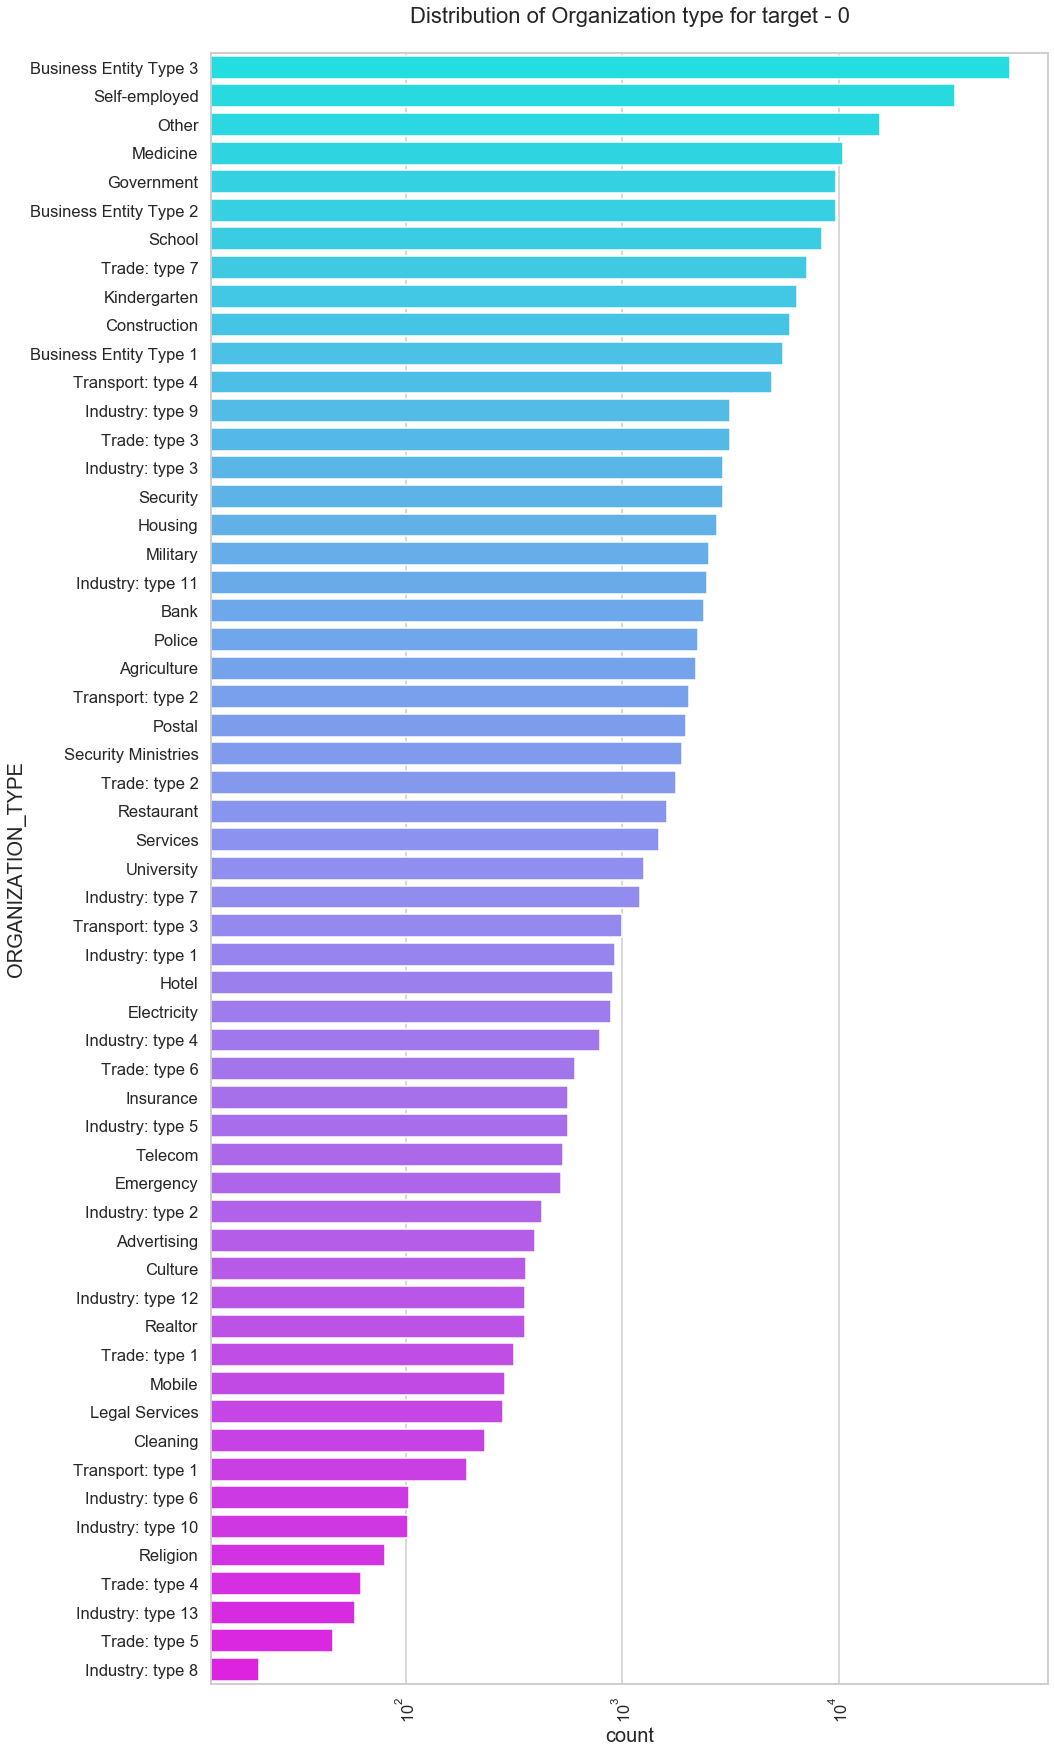

In [58]:

# Plotting for Organization type in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0,y='ORGANIZATION_TYPE',order=target0['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()


Insights inferred from the above plot

Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ , ‘Medicine’ and ‘Government’.

Less clients are from Industry type 8,type 6, type 10, religion and trade type 5, type 4.

## Categoroical Univariate Analysis in logarithmic scale for target - 1 (Client with payment difficulties)

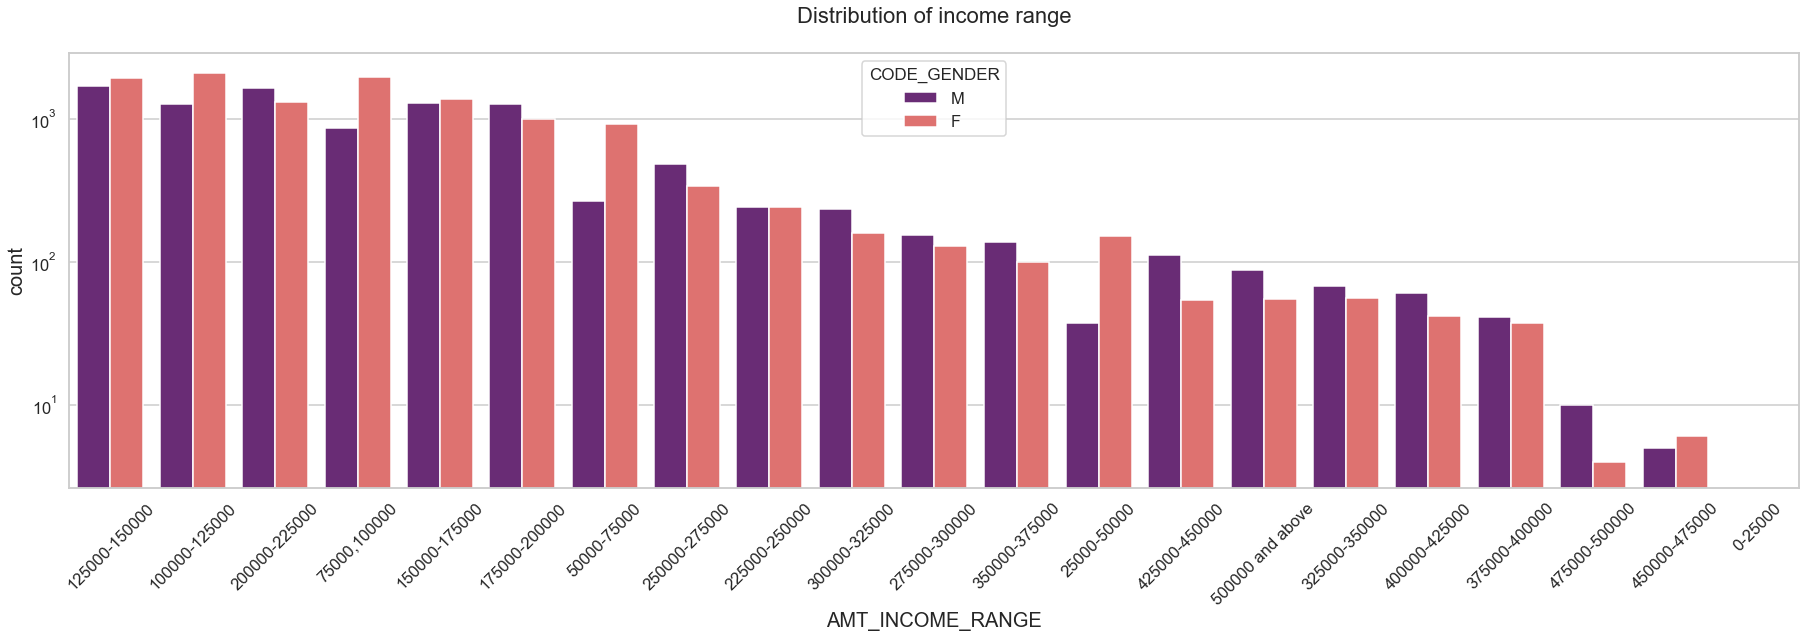

In [59]:
# PLotting for income range

uniplot(target1,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Points to be concluded from the above graph.

Male counts are higher than female.
Income range from 100000 to 200000 is having more number of credits.
This graph show that males are more than female in having credits for that range.
Very less count for income range 400000 and above.

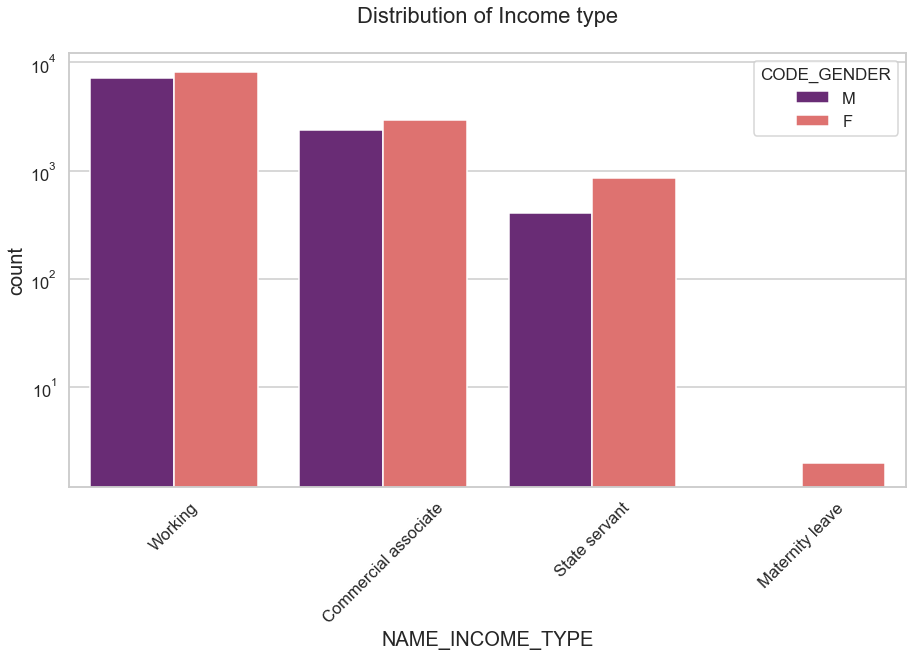

In [60]:
# Plotting for Income type

uniplot(target1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')


Points to be concluded from the above graph.

For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e. ‘Maternity leave.
For this Females are having more number of credits than male.
Less number of credits for income type ‘Maternity leave’.
For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

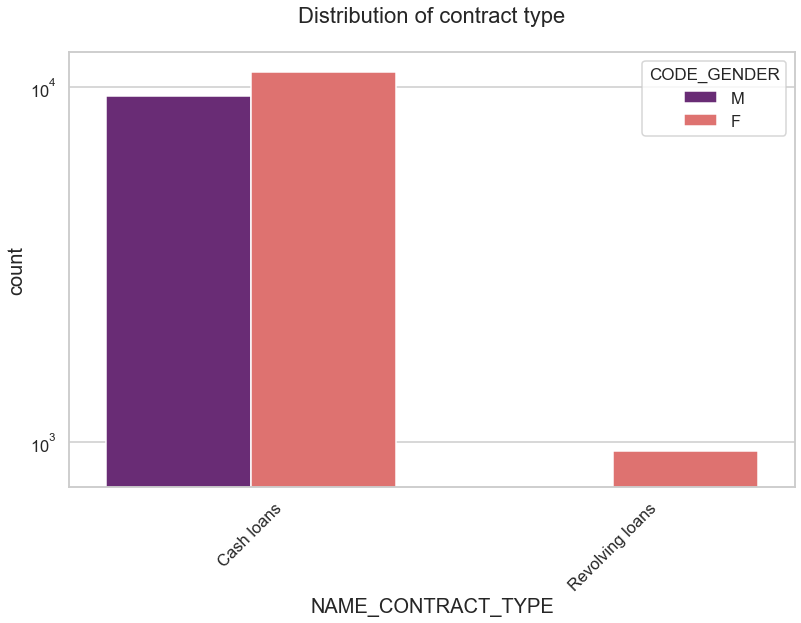

In [61]:
# Plotting for Contract type

uniplot(target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
For this also Female is leading for applying credits.
For type 1 : there is only Female Revolving loans.

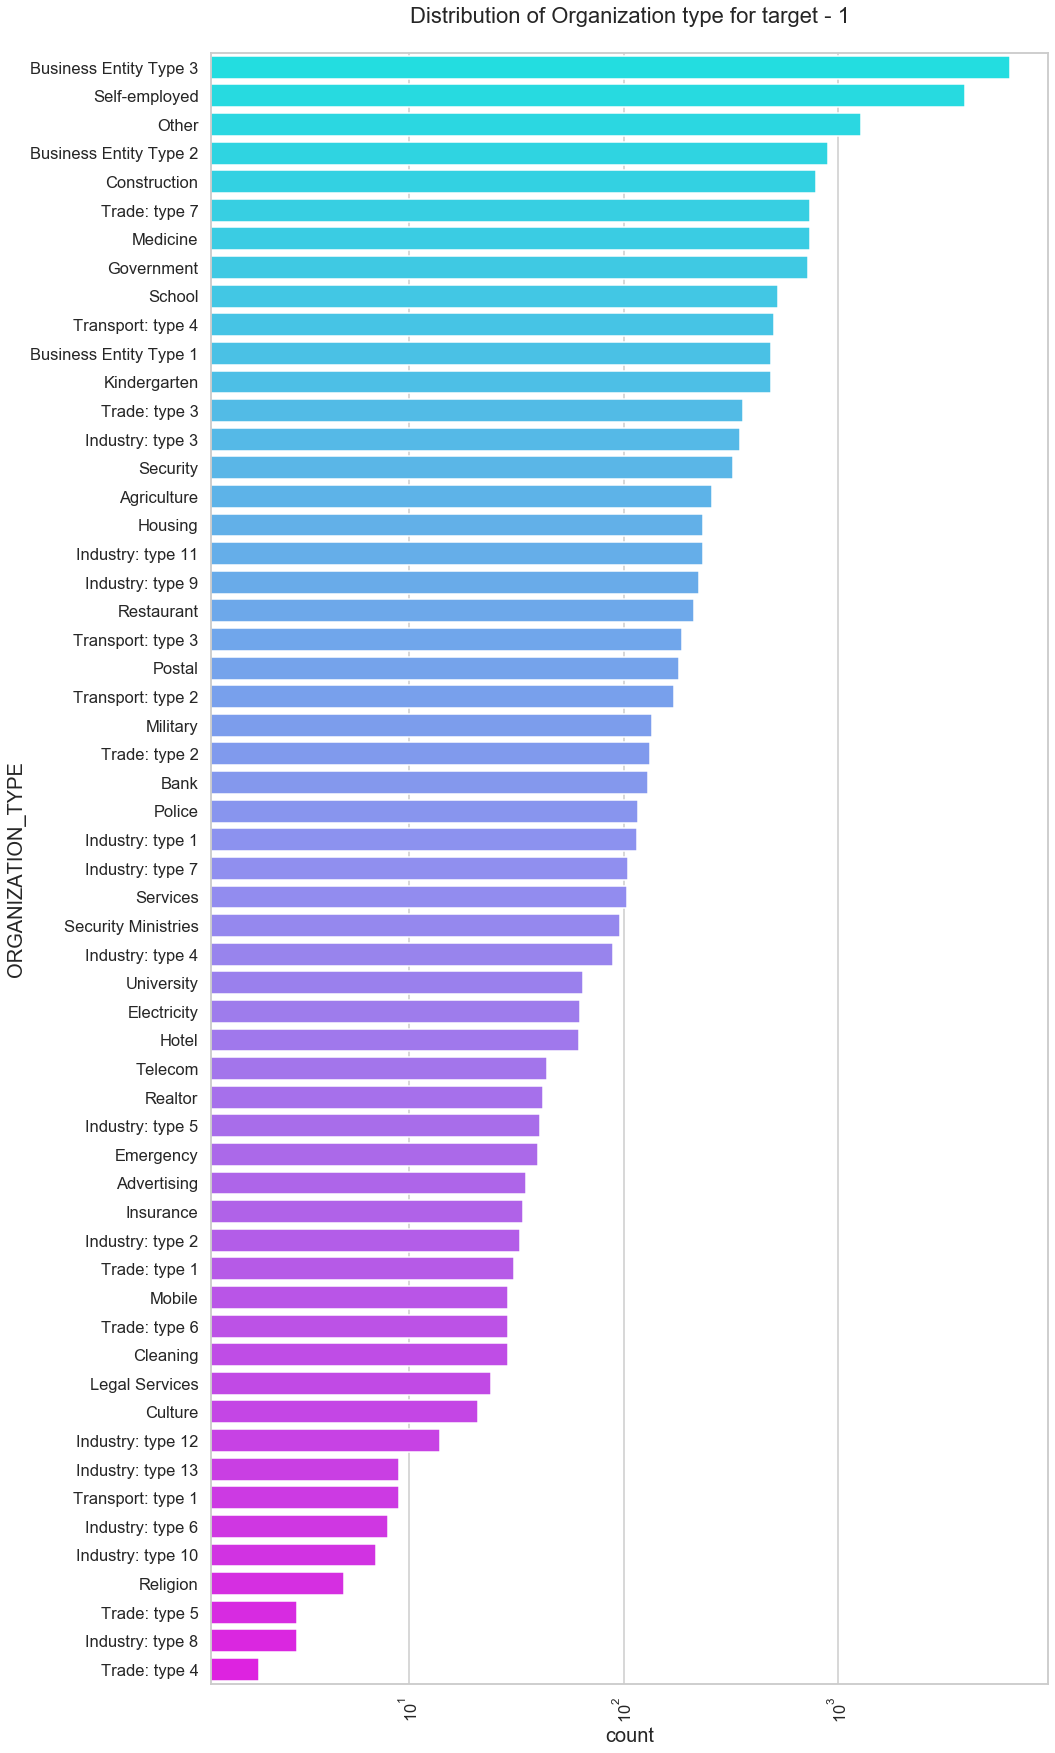

In [62]:
# Plotting for Organization type

sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target1,y='ORGANIZATION_TYPE',order=target1['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Insights inferred from the above plot

Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’, ‘Other’ 

Less clients are from Industry type 4,type 8, type 5, religion and trade type 10, type 6.

In [63]:
# Finding some correlation for numerical columns for both target 0 and 1 

target0_corr=target0.iloc[0:,2:]
target1_corr=target1.iloc[0:,2:]

target0cr=target0_corr.corr(method='spearman')
target1cr=target1_corr.corr(method='spearman')


In [64]:
# Correlation for target 0

target0cr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.021950,-0.023652,-0.010795,-0.030579,-0.266534,-0.030948,-0.155518,0.119164,-0.030162,-0.022813,-0.015475,-0.005576,0.002344,0.007487,0.013295
AMT_INCOME_TOTAL,-0.021950,1.000000,0.403876,0.472204,0.110074,0.054666,0.060868,-0.040559,0.036702,0.073503,0.077634,0.159962,0.148281,-0.001023,-0.013856,-0.004758
AMT_CREDIT,-0.023652,0.403876,1.000000,0.826689,0.060706,0.169030,0.104251,0.015318,0.038197,0.036923,0.015118,0.041693,0.045175,-0.040616,-0.037000,-0.011194
AMT_ANNUITY,-0.010795,0.472204,0.826689,1.000000,0.064328,0.100287,0.074643,-0.010712,0.027354,0.032953,0.033435,0.070841,0.069051,-0.019954,-0.024085,-0.008087
REGION_POPULATION_RELATIVE,-0.030579,0.110074,0.060706,0.064328,1.000000,0.041663,-0.000900,0.042400,0.010299,0.133213,-0.025292,0.032446,0.056814,-0.049779,-0.034808,-0.007332
DAYS_BIRTH,-0.266534,0.054666,0.169030,0.100287,0.041663,1.000000,0.307787,0.265449,0.083331,-0.051299,-0.058627,-0.038104,-0.012789,-0.167477,-0.111539,-0.029007
DAYS_EMPLOYED,-0.030948,0.060868,0.104251,0.074643,-0.000900,0.307787,1.000000,0.126708,0.106823,-0.026444,-0.065435,-0.086966,-0.063533,-0.118224,-0.125954,-0.069567
DAYS_REGISTRATION,-0.155518,-0.040559,0.015318,-0.010712,0.042400,0.265449,0.126708,1.000000,0.036788,0.029553,-0.017715,-0.015092,-0.007716,-0.038064,-0.047339,-0.027231
DAYS_ID_PUBLISH,0.119164,0.036702,0.038197,0.027354,0.010299,0.083331,0.106823,0.036788,1.000000,-0.008538,-0.027302,-0.020823,-0.008525,-0.054875,-0.033427,-0.001476
HOUR_APPR_PROCESS_START,-0.030162,0.073503,0.036923,0.032953,0.133213,-0.051299,-0.026444,0.029553,-0.008538,1.000000,0.051744,0.067352,0.053813,0.011287,-0.005971,-0.010720


In [65]:
# Correlation for target 1

target1cr

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.039123,0.000427,0.015133,-0.029682,-0.175025,-0.006823,-0.110854,0.091042,-0.040338,-0.035213,-0.040853,-0.027993,-0.016072,-0.005444,0.009557
AMT_INCOME_TOTAL,-0.039123,1.000000,0.364559,0.428947,0.058005,0.103026,0.053798,-0.011378,0.051113,0.078779,0.075615,0.156374,0.145982,-0.003813,-0.006241,0.004230
AMT_CREDIT,0.000427,0.364559,1.000000,0.812093,0.043545,0.200718,0.107605,0.021973,0.065143,0.024616,0.015043,0.032536,0.034861,-0.030974,-0.032882,-0.012465
AMT_ANNUITY,0.015133,0.428947,0.812093,1.000000,0.028666,0.100200,0.060193,-0.019762,0.044128,0.021129,0.029646,0.060363,0.059724,-0.011744,-0.015938,-0.003012
REGION_POPULATION_RELATIVE,-0.029682,0.058005,0.043545,0.028666,1.000000,0.044444,0.015246,0.033490,0.017779,0.109400,-0.032702,-0.008160,0.012602,-0.057239,-0.044761,-0.014753
DAYS_BIRTH,-0.175025,0.103026,0.200718,0.100200,0.044444,1.000000,0.256870,0.192350,0.146246,-0.041994,-0.046320,-0.022208,-0.000356,-0.145884,-0.096181,-0.009633
DAYS_EMPLOYED,-0.006823,0.053798,0.107605,0.060193,0.015246,0.256870,1.000000,0.086286,0.104244,-0.010328,-0.069566,-0.082264,-0.056081,-0.118869,-0.139863,-0.069316
DAYS_REGISTRATION,-0.110854,-0.011378,0.021973,-0.019762,0.033490,0.192350,0.086286,1.000000,0.061563,0.044753,-0.006362,-0.000896,0.001416,-0.015831,-0.039204,-0.026105
DAYS_ID_PUBLISH,0.091042,0.051113,0.065143,0.044128,0.017779,0.146246,0.104244,0.061563,1.000000,-0.012709,-0.024860,-0.013162,-0.002567,-0.048184,-0.015838,0.015598
HOUR_APPR_PROCESS_START,-0.040338,0.078779,0.024616,0.021129,0.109400,-0.041994,-0.010328,0.044753,-0.012709,1.000000,0.050953,0.063877,0.050300,0.003947,0.004775,0.002319


In [66]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()



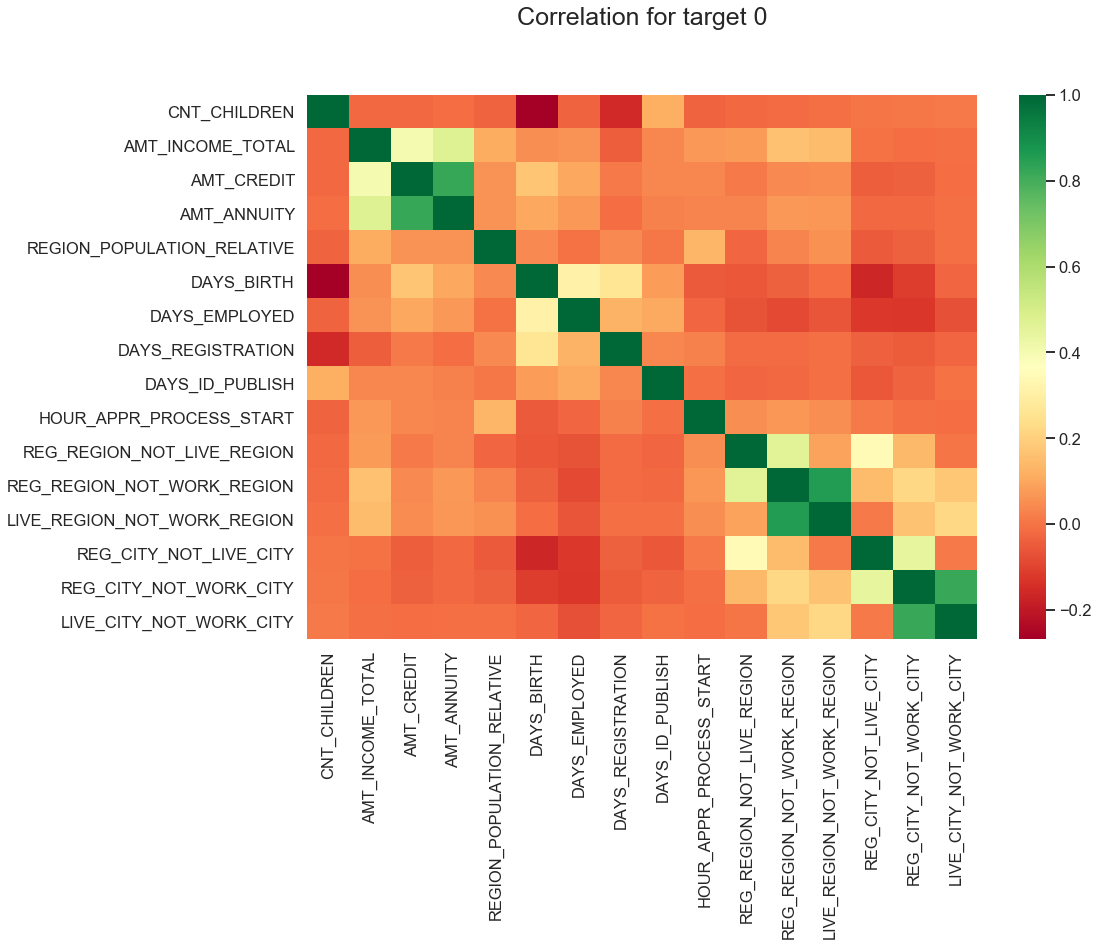

In [67]:
# For Target 0

targets_corr(data=target0cr,title='Correlation for target 0')

As we can see from above correlation heatmap, There are number of observation we can point out

Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.

Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.

Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.

less children client have in densely populated area.

Credit amount is higher to densely populated area.

The income is also higher in densely populated area.

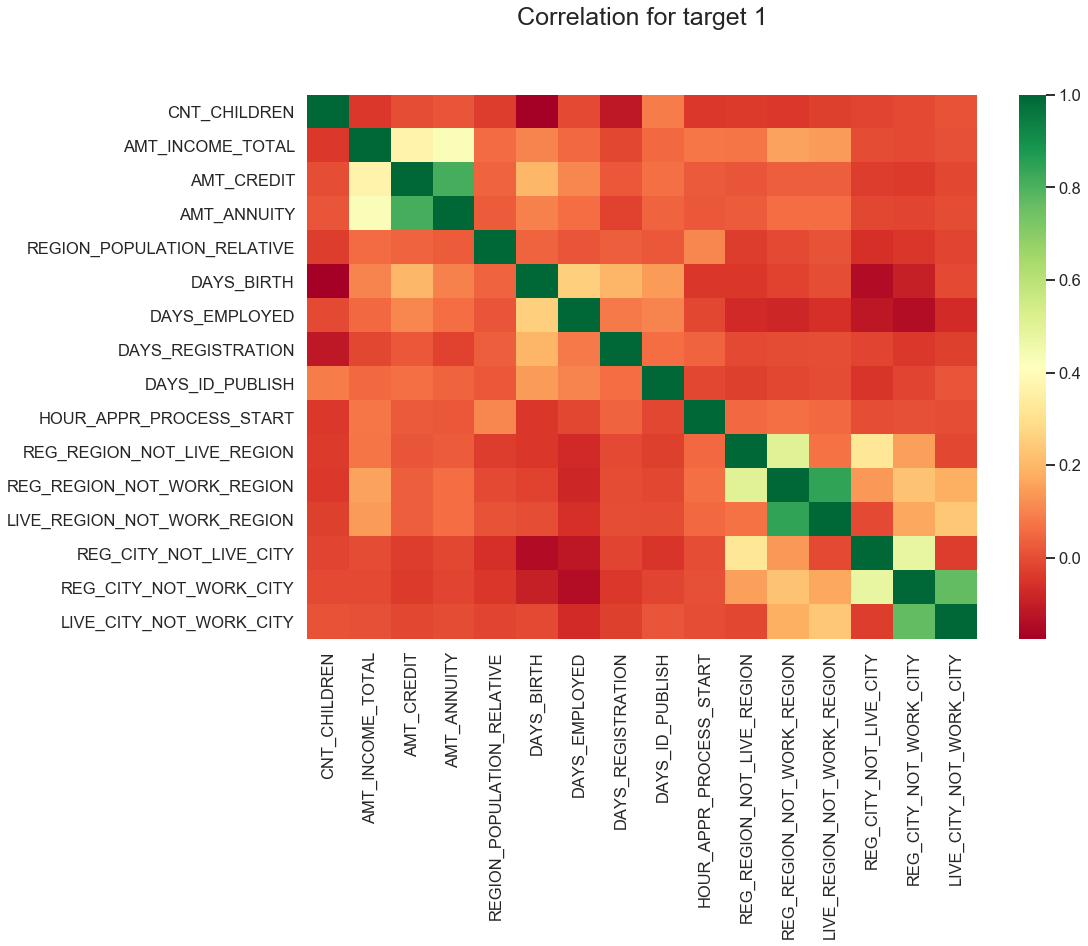

In [68]:
# For Target 1

targets_corr(data=target1cr,title='Correlation for target 1')

This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

The client's permanent address does not match contact address are having less children and vice-versa

the client's permanent address does not match work address are having less children and vice-versa

### Univariate Analysis for both the targets to explore insights 

In [69]:


# Box plotting for univariate variables analysis in logarithmic scale

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target0, x=col,orient='v')
    plt.show()

### For Target-0  Univariate Analysis

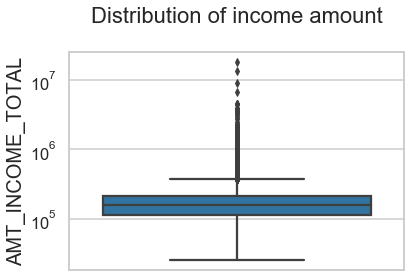

In [70]:

# Distribution of income amount

univariate_numerical(data=target0,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Few points can be concluded from the graph above.

Some outliers are noticed in income amount.

The third quartiles is very slim for income amount.

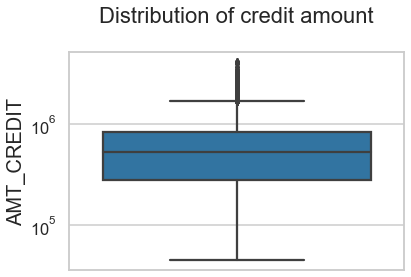

In [71]:
# Disrtibution of credit amount

univariate_numerical(data=target0,col='AMT_CREDIT',title='Distribution of credit amount')

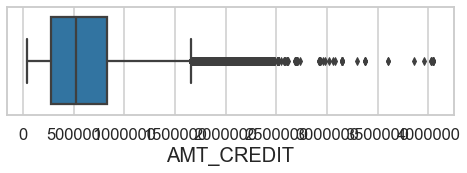

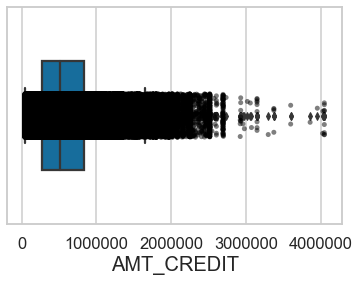

In [72]:
#Plot to see outliers in AMT_INCOME_TOTAL 
plt.figure(figsize=[8,2])
sns.boxplot(inp2.AMT_CREDIT)
plt.show()

# make boxplot with Seaborn
bplot=sns.boxplot(inp2.AMT_CREDIT, 
                 width=0.5,
                 palette="colorblind")
 
# add stripplot to boxplot with Seaborn
bplot=sns.stripplot(inp2.AMT_CREDIT,  
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   color='black')


Few points can be concluded from the graph above.

Some outliers are noticed in credit amount.
The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

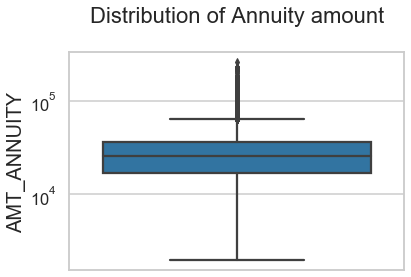

In [73]:
# Distribution of anuuity amount

univariate_numerical(data=target0,col='AMT_ANNUITY',title='Distribution of Annuity amount')


Few points can be concluded from the graph above.


The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

### For Target-1  Univariate Analysis

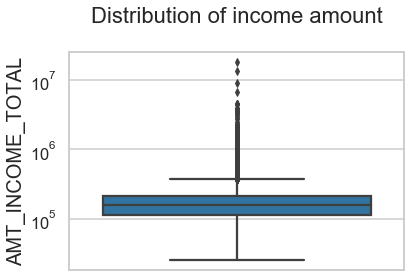

In [74]:
# Distribution of income amount

univariate_numerical(data=target1,col='AMT_INCOME_TOTAL',title='Distribution of income amount')

Few points can be concluded from the graph above.


Some outliers are noticed in income amount.

The third quartiles is very slim for income amount.

Most of the clients of income are present in first quartile.


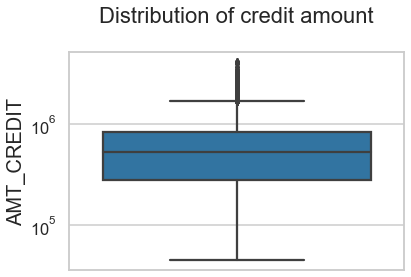

In [75]:
# Distribution of credit amount

univariate_numerical(data=target1,col='AMT_CREDIT',title='Distribution of credit amount')

Few points can be concluded from the graph above.

Some outliers are noticed in credit amount.
The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

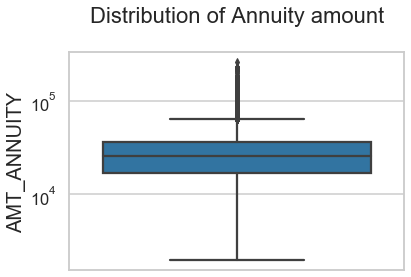

In [76]:
# Distribution of Annuity amount

univariate_numerical(data=target1,col='AMT_ANNUITY',title='Distribution of Annuity amount')


Few points can be concluded from the graph above.


Some outliers are noticed in annuity amount.
The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

### Bivariate analysis for Target 0 

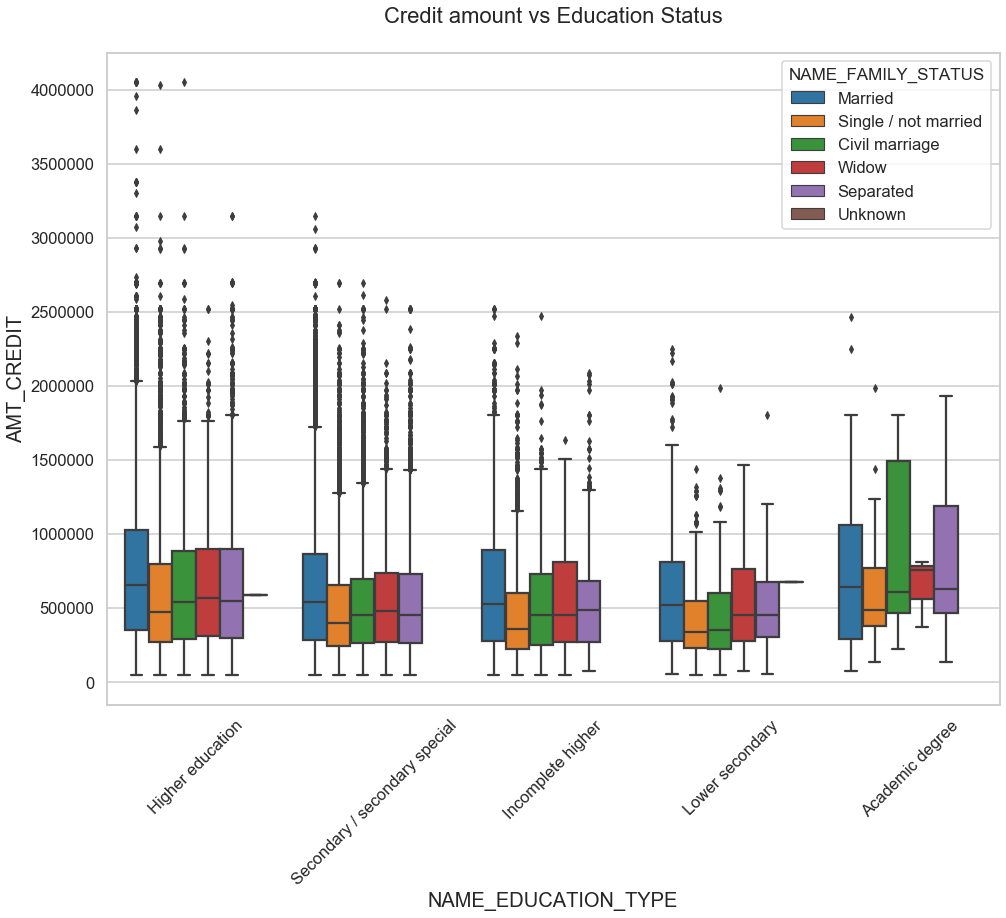

In [77]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers. Civil marriage for Academic degree is having most of the credits in the third quartile.

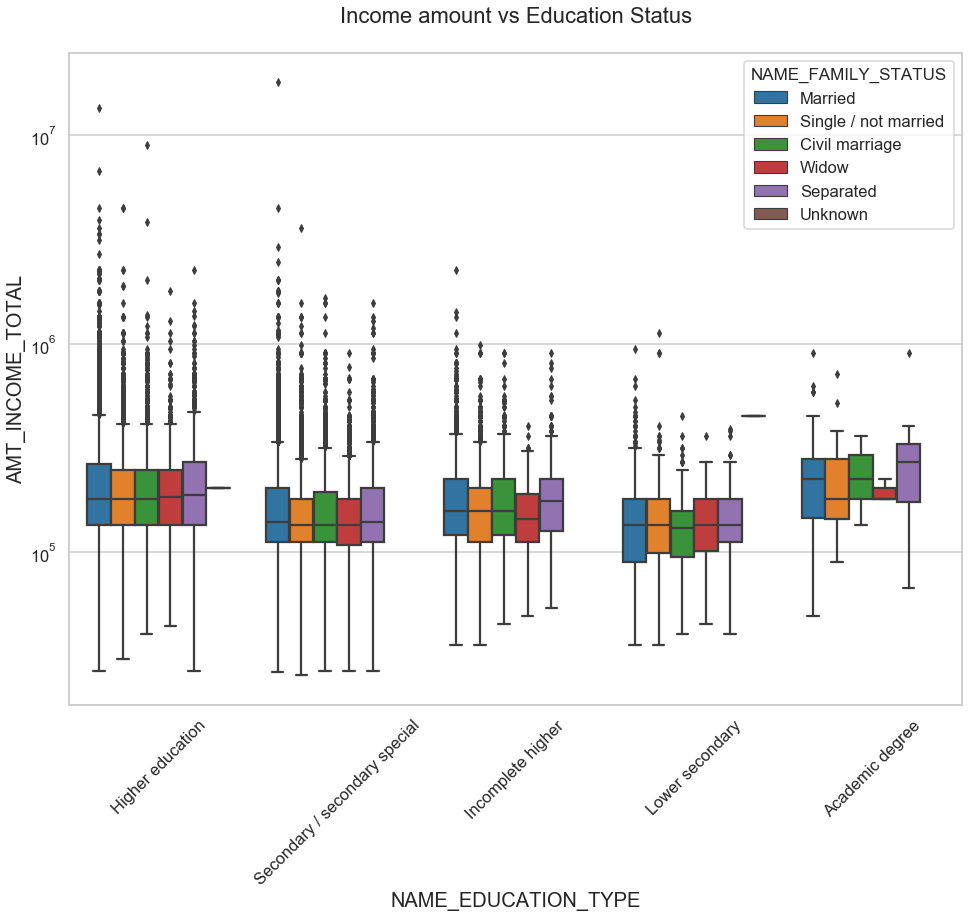

In [78]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education. Lower secondary of civil marriage family status are have less income amount than others.

### Bivariate analysis for Target 1

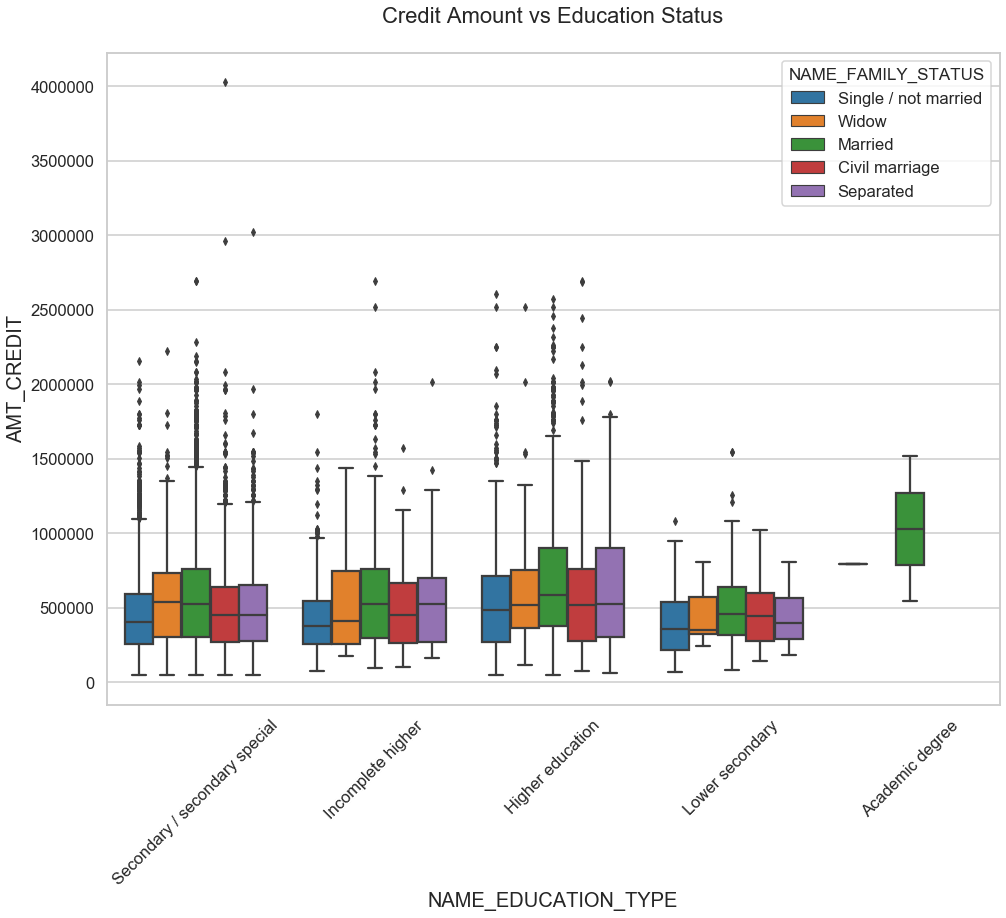

In [79]:
# Box plotting for credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

There is a difference here when compared to Target-0 with Target 1 . 

Only Married family status people in having an academic degree have higher credit than other categories.

We could see lot of outliers in other categories such as secondary,Incomplete Higher,Higher Education , Lower Secondary

People seperated with higher education background have high credits as their third quartile is bigger when compared with other categories and their counterparts

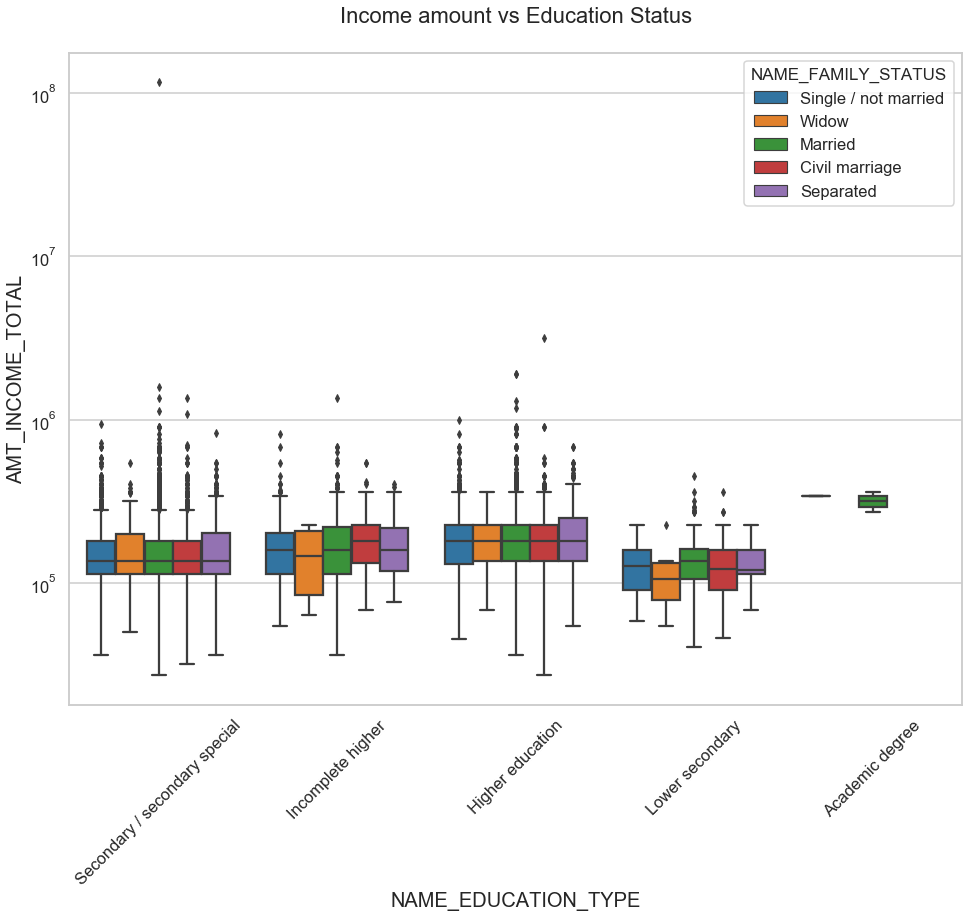

In [80]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From the above plot ,

WE could see that Maried customer with Academic Degree are the once who have high income  than all other categories. 
We also could not spot any outliers in academic degree. 

Most customers of different family status with lower seconday have low income when compared to all others

Customer who are Widow and of incomplete higher Education has the least income among all others. 



# Analysis of Previous application Data 

In [81]:
#Reading the Data Dictionary for columns in previous application Data 
cols_data.rename(columns = {'Unnamed: 0':'Serial No'}, inplace = True) 
cols_data.set_index('Serial No')


,Table,Row,Description,Special
Serial No,,,,
1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
6,application_data,CODE_GENDER,Gender of the client,NaN
7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
9,application_data,CNT_CHILDREN,Number of children the client has,NaN
10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
11,application_data,AMT_CREDIT,Credit amount of the loan,NaN


In [82]:
#To check the shape of Previous application Dataframe 

inp1.shape

(1670214, 37)

In [83]:
# Check for the columns in the inp1 Dataframe (Previous application)- henceforth called as inp1
inp1.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [84]:
# Check the column stats
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [85]:
# Describe to see the mean and min and max value in dataframe inp1
inp1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [86]:
# Check for sample data from inp1

inp1.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


From the Data we could see there are null values in the dataframe and also few missing values like XNA and XAP we will be handling this downstream in the code below

In [87]:
# Cleaning the missing data

# listing the null values columns having more than 30%

emptycol1=inp1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [88]:
# Cleaning the data 
# Exlpore for null values 
nullcolumns=inp1.isnull().sum()
nullcolumns

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [89]:
#Check the percentage of null values in the columns of inp1 dataframe 
round(inp1.isnull().sum()/len(inp1)*100,2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

In [90]:
##To find the columns having more than 50% null values 
emptynullcol=inp1.isnull().sum()
emptynullcol=emptynullcol[emptynullcol.values>(0.5*len(emptynullcol))]
emptynullcol

AMT_ANNUITY                   372235
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
NAME_TYPE_SUITE               820405
CNT_PAYMENT                   372230
PRODUCT_COMBINATION              346
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64

In [91]:
#Drop the Null values 

emptynullcol = list(emptynullcol[emptynullcol.values>=0.5].index)
inp1.drop(labels=emptynullcol,axis=1,inplace=True)
print(len(emptynullcol))

15


In [92]:
#Check the percentage of null values in the columns of inp1 dataframe after dropping few columns greater than 50% null
round(inp1.isnull().sum()/len(inp1)*100,2)

SK_ID_PREV                     0.0
SK_ID_CURR                     0.0
NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
dtype: float64

Now we have 22 columns without null values , now we inspect for missing values and data correction and dataype correctin for few columns

In [93]:
#Checck for XNA and XAP in Column NAME_CASH_LOAN_PURPOSE
inp1.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

We found we have XAP-922661 and XNA-67791 We have to delte the data as it is more than 30%

In [94]:
# Removing the column values of 'XNA' and 'XAP'

inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inp1=inp1.drop(inp1[inp1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

inp1.NAME_CASH_LOAN_PURPOSE.value_counts()

Repairs                             23765
Other                               15608
Urgent needs                         8412
Buying a used car                    2888
Building a house or an annex         2693
Everyday expenses                    2416
Medicine                             2174
Payments on other loans              1931
Education                            1573
Journey                              1239
Purchase of electronic equipment     1061
Buying a new car                     1012
Wedding / gift / holiday              962
Buying a home                         865
Car repairs                           797
Furniture                             749
Buying a holiday home / land          533
Business development                  426
Gasification / water supply           300
Buying a garage                       136
Hobby                                  55
Money for a third person               25
Refusal to name the goal               15
Name: NAME_CASH_LOAN_PURPOSE, dtyp

In [95]:
# Check for shape after XNA and XAP handling 
inp1.shape

(69635, 22)

In [96]:
# Check for sample data in inp1
inp1.head(20)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
5,1383531,199383,Cash loans,315000.0,340573.5,SATURDAY,8,Y,1,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
19,1173070,199178,Cash loans,45000.0,49455.0,SATURDAY,16,Y,1,Everyday expenses,Refused,-584,XNA,HC,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),6,XNA,high
51,2664403,163660,Cash loans,67500.0,82611.0,SATURDAY,10,Y,1,Car repairs,Approved,-766,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
85,1981960,306707,Cash loans,225000.0,269550.0,WEDNESDAY,11,Y,1,Building a house or an annex,Refused,-13,Cash through the bank,SCOFR,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
172,1382147,336630,Cash loans,112500.0,127350.0,MONDAY,13,Y,1,Other,Approved,-631,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),4,XNA,high
222,1876485,354388,Cash loans,976500.0,1061572.5,FRIDAY,12,Y,1,Repairs,Refused,-210,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
273,1168330,133439,Cash loans,180000.0,203760.0,WEDNESDAY,11,Y,1,Other,Refused,-553,XNA,LIMIT,Repeater,XNA,Cash,walk-in,Country-wide,30,Connectivity,high
312,2793811,139978,Cash loans,229500.0,302206.5,THURSDAY,8,Y,1,Repairs,Refused,-33,Cash through the bank,SCOFR,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
313,2036767,159610,Cash loans,135000.0,182956.5,SATURDAY,10,Y,1,Repairs,Refused,-492,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [97]:
#check Column info
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69635 entries, 4 to 1670206
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   69635 non-null  int64  
 1   SK_ID_CURR                   69635 non-null  int64  
 2   NAME_CONTRACT_TYPE           69635 non-null  object 
 3   AMT_APPLICATION              69635 non-null  float64
 4   AMT_CREDIT                   69635 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START   69635 non-null  object 
 6   HOUR_APPR_PROCESS_START      69635 non-null  int64  
 7   FLAG_LAST_APPL_PER_CONTRACT  69635 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       69635 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       69635 non-null  object 
 10  NAME_CONTRACT_STATUS         69635 non-null  object 
 11  DAYS_DECISION                69635 non-null  int64  
 12  NAME_PAYMENT_TYPE            69635 non-null  object 
 13  CODE_REJECT_RE

In [98]:
#Merging the Application dataset with previous appliaction dataset

Master=pd.merge(left=inp2,right=inp1,how='inner',on='SK_ID_CURR',suffixes='_x')

In [99]:
# Renaming the column names after merging

master1= Master.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

In [100]:
# Check Sample data in master dataframe after merge of inp1 and inp1
Master.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START_,HOUR_APPR_PROCESS_START_,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Current_date,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPEx,AMT_APPLICATION,AMT_CREDITx,WEEKDAY_APPR_PROCESS_STARTx,HOUR_APPR_PROCESS_STARTx,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,"75000,100000",150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,275000-300000,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,THURSDAY,10,0,0,0,1,1,0,Self-employed,2020-06-22,350000-375000,700000-750000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,175000-200000,500000-550000,1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,175000-200000,500000-550000,1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [101]:
#check for columns in master dataframe 
Master.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START_', 'HOUR_APPR_PROCESS_START_', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'Current_date', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPEx', 'AMT_APPLICATION', 'AMT_CREDITx', 'WEEKDAY_APPR_PROCESS_STARTx', 'HOUR_APPR_PROCESS_STARTx', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY

In [102]:
master1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,Current_date,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,WEEKDAY_APPR_PROCESS_START_PREV,HOUR_APPR_PROCESS_START_PREV,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100034,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,TUESDAY,16,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,"75000,100000",150000-200000,1390369,Cash loans,94500.0,109971.0,FRIDAY,11,Y,1,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,275000-300000,650000-700000,1344613,Cash loans,1260000.0,1260000.0,WEDNESDAY,14,Y,1,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,THURSDAY,10,0,0,0,1,1,0,Self-employed,2020-06-22,350000-375000,700000-750000,1077565,Cash loans,1350000.0,1487214.0,MONDAY,14,Y,1,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,175000-200000,500000-550000,1223113,Cash loans,337500.0,407911.5,MONDAY,13,Y,1,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,TUESDAY,8,0,0,0,0,0,0,Business Entity Type 3,2020-06-22,175000-200000,500000-550000,1529558,Cash loans,450000.0,555723.0,MONDAY,15,Y,1,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [103]:
master1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'Current_date', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV', 'WEEKDAY_APPR_PROCESS_START_PREV', 'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GO

In [104]:
# Removing unwanted columns for analysis

master1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [105]:
#view sample data after dropping unwanted columns 
master1.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,ORGANIZATION_TYPE,Current_date,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_PREV,AMT_APPLICATION,AMT_CREDIT_PREV,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,0,Revolving loans,M,N,Y,0,90000.0,180000.0,9000.0,Working,Higher education,Single / not married,With parents,0.030755,10341,1010,4799.0,3015,Business Entity Type 3,2020-06-22,"75000,100000",150000-200000,1390369,Cash loans,94500.0,109971.0,Other,Approved,-599,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
1,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,15280,2668,5266.0,3787,Business Entity Type 3,2020-06-22,275000-300000,650000-700000,1344613,Cash loans,1260000.0,1260000.0,Payments on other loans,Refused,-119,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
2,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,Commercial associate,Secondary / secondary special,Married,House / apartment,0.015221,11694,2060,3557.0,3557,Self-employed,2020-06-22,350000-375000,700000-750000,1077565,Cash loans,1350000.0,1487214.0,Buying a used car,Approved,-695,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
3,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Business Entity Type 3,2020-06-22,175000-200000,500000-550000,1223113,Cash loans,337500.0,407911.5,Repairs,Approved,-539,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
4,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,Working,Higher education,Married,House / apartment,0.025164,16126,1761,8236.0,4292,Business Entity Type 3,2020-06-22,175000-200000,500000-550000,1529558,Cash loans,450000.0,555723.0,Repairs,Refused,-449,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal


In [106]:
# View columns 
master1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51420 entries, 0 to 51419
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   TARGET                      51420 non-null  int64   
 1   NAME_CONTRACT_TYPE          51420 non-null  object  
 2   CODE_GENDER                 51420 non-null  object  
 3   FLAG_OWN_CAR                51420 non-null  object  
 4   FLAG_OWN_REALTY             51420 non-null  object  
 5   CNT_CHILDREN                51420 non-null  int64   
 6   AMT_INCOME_TOTAL            51420 non-null  float64 
 7   AMT_CREDIT                  51420 non-null  float64 
 8   AMT_ANNUITY                 51420 non-null  float64 
 9   NAME_INCOME_TYPE            51420 non-null  object  
 10  NAME_EDUCATION_TYPE         51420 non-null  object  
 11  NAME_FAMILY_STATUS          51420 non-null  object  
 12  NAME_HOUSING_TYPE           51420 non-null  object  
 13  REGION_POPULATIO

In [107]:
master1.columns

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'ORGANIZATION_TYPE', 'Current_date', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP'], dtype='object')

## Performing univariate analysis

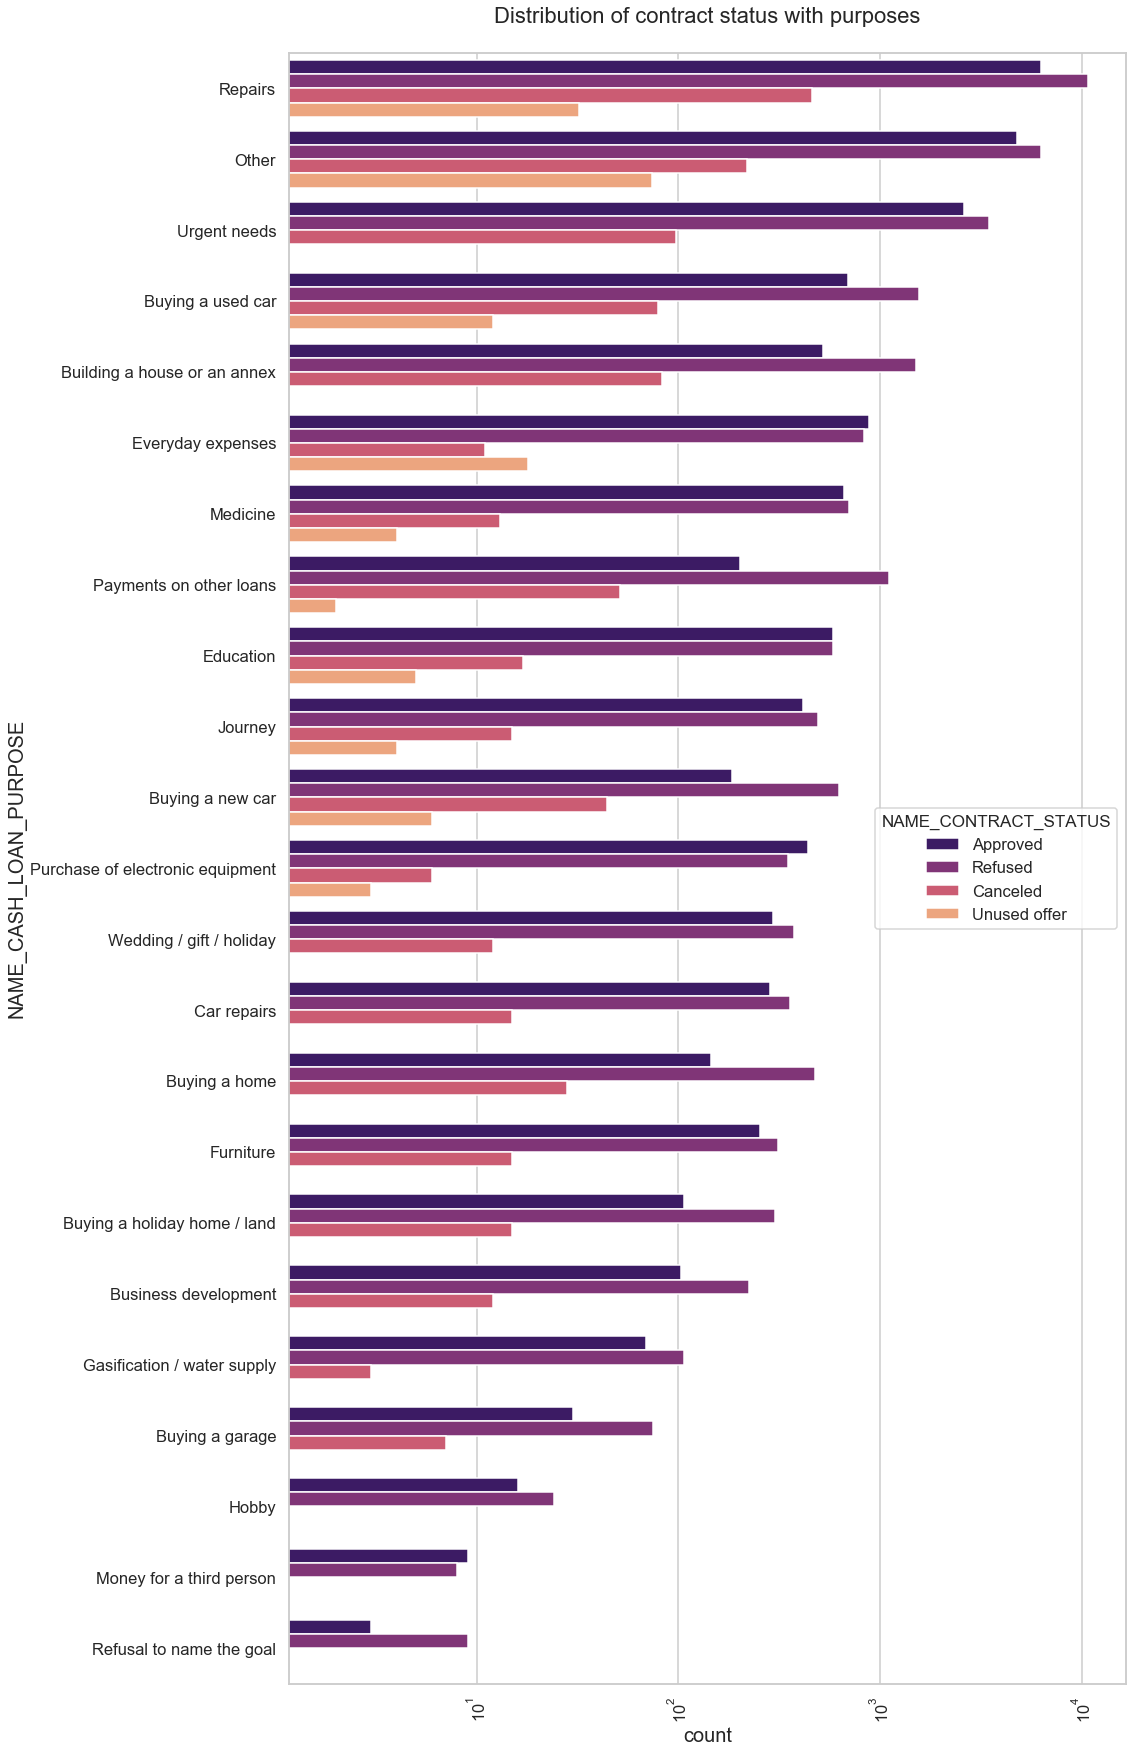

In [108]:
# Distribution of contract status in logarithmic scale
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data =master1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=master1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue ='NAME_CONTRACT_STATUS',palette='magma')


Points to be concluded from above plot:

Most rejection of loans came from purpose 'repairs'.

For education purposes we have equal number of approves and rejection

Paying other loans and buying a new car is having significant higher rejection than approves.

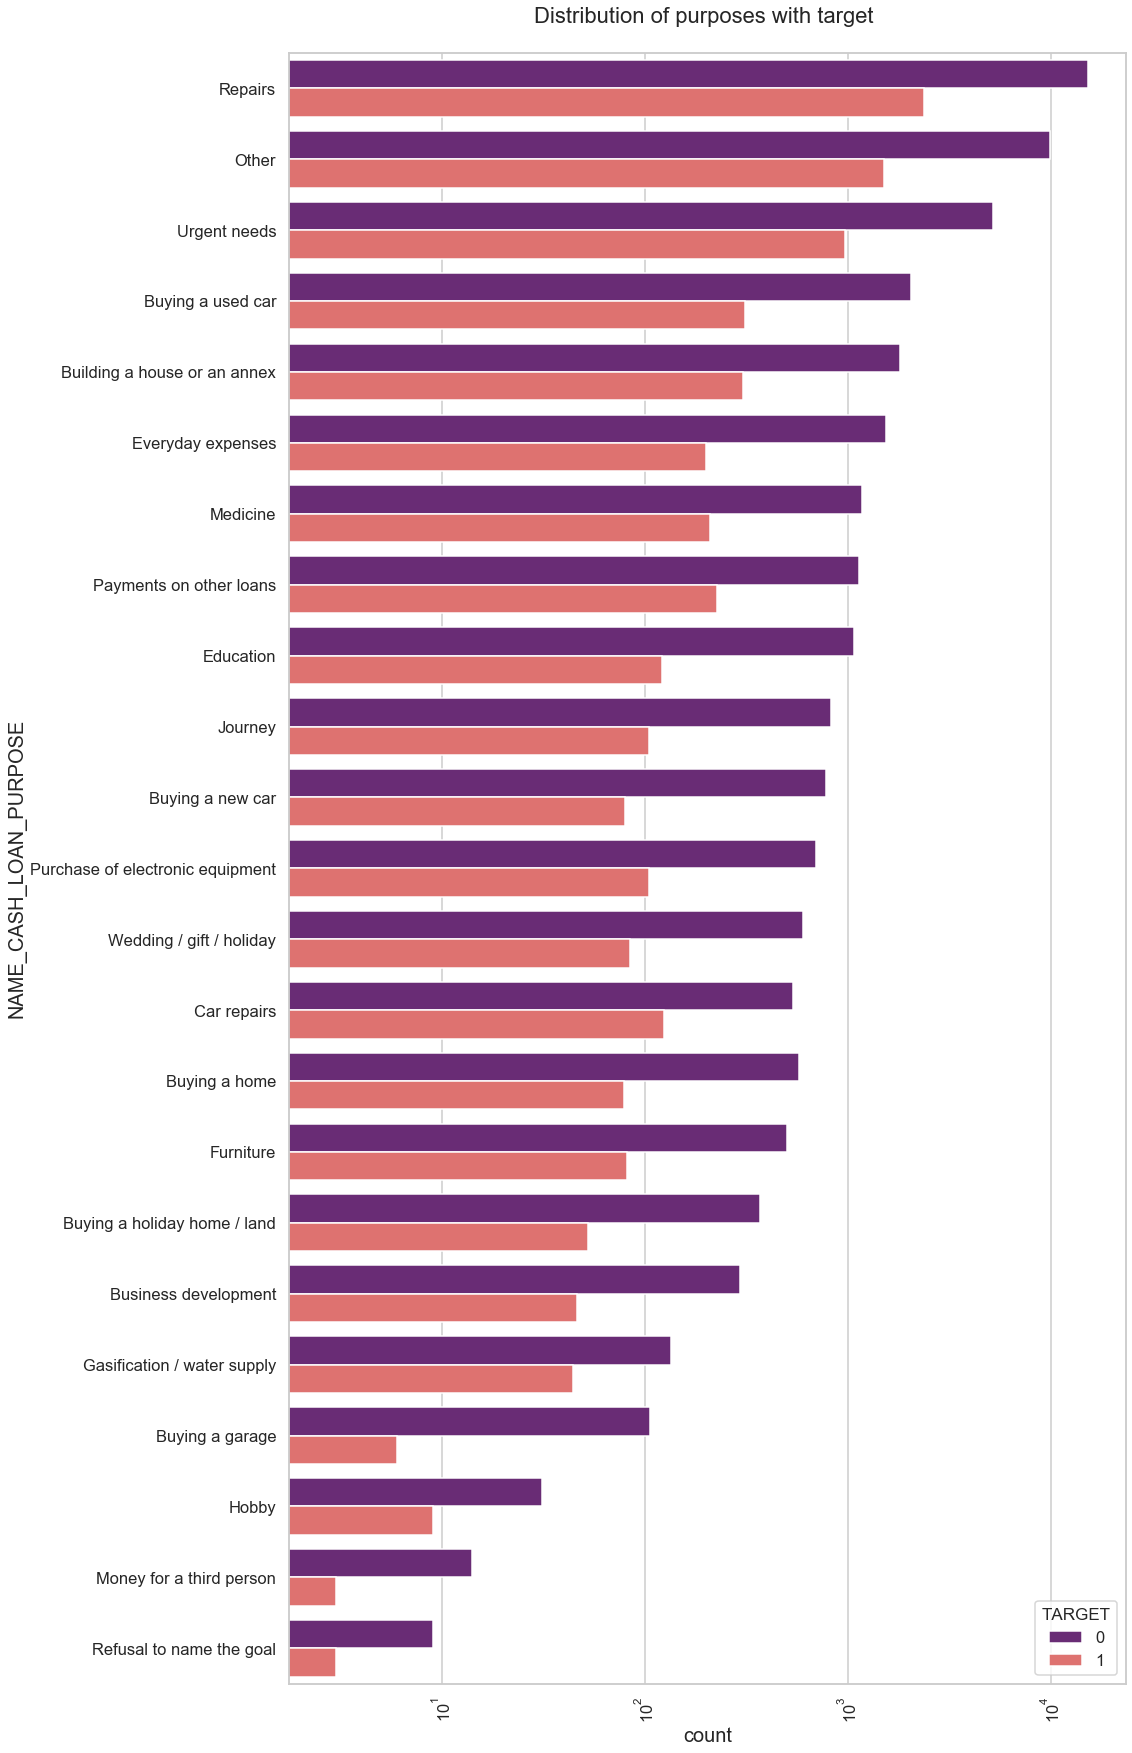

In [109]:
# Distribution of contract status

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = master1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=master1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')


Few points we can conclude from abpve plot:

Loan purposes with 'Repairs' are facing more difficulites in payment on time.

There are few places where loan payment is significant higher than facing difficulties. 

They are 'Buying a garage', 'Business developemt', 'Buying land','Buying a new car' and 'Education'

Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

## Performing bivariate analysis

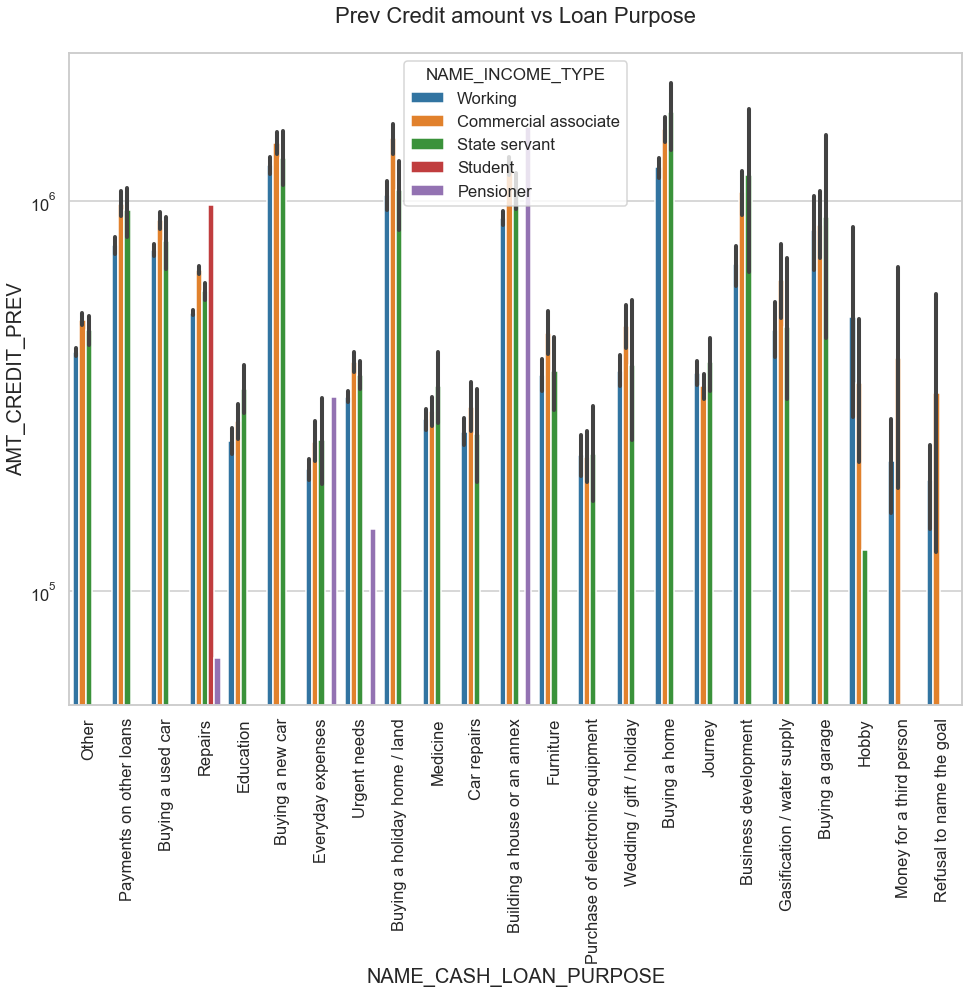

In [110]:
# Box plotting for Credit amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.barplot(data =master1, x='NAME_CASH_LOAN_PURPOSE',hue='NAME_INCOME_TYPE',y='AMT_CREDIT_PREV',orient='v')
plt.title('Prev Credit amount vs Loan Purpose')
plt.show()


From the above we can conclude some points-

The credit amount of Loan purposes like 'Buying a holiday home','Buying a land','Buying a new car' and'Building a house' is higher.

Income type of state servants have a significant amount of credit applied

Money for third person or a Hobby is having less credits applied for.

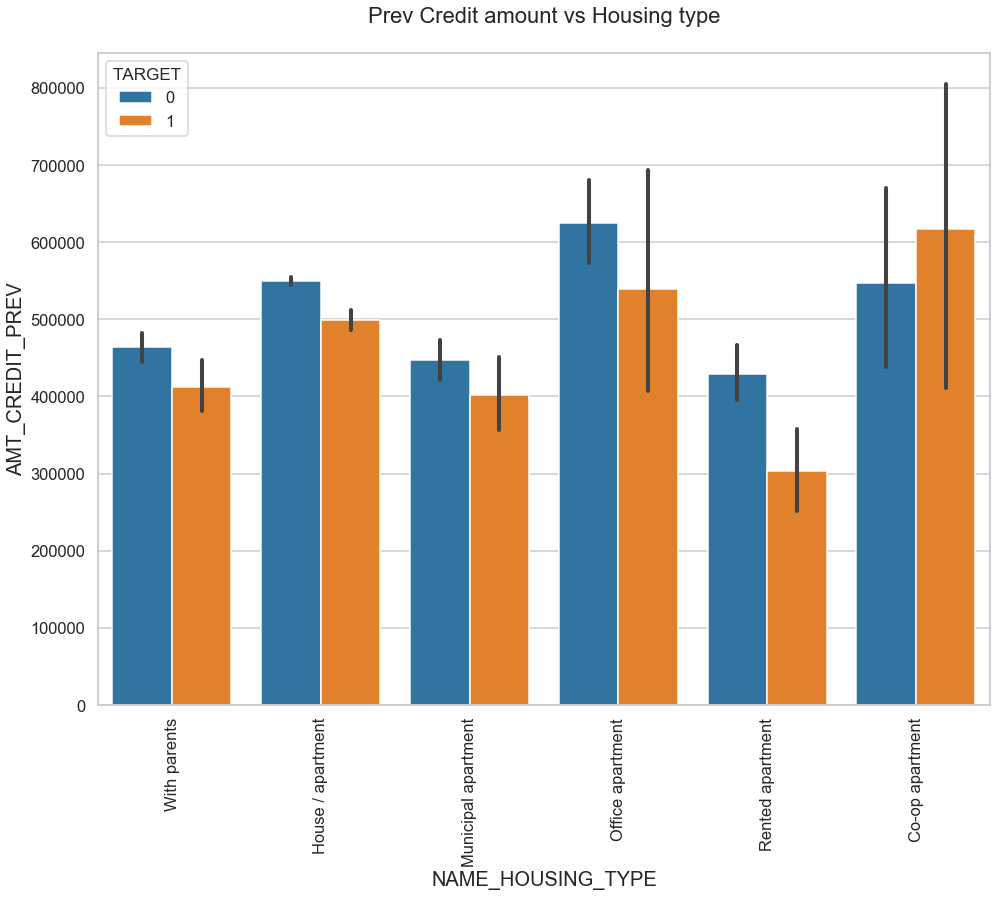

In [111]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =master1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1. So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment. Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments

## CONCLUSION

#### 1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other than ‘Co-op apartment’ for successful payments.

#### 2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.

#### 3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.

#### 4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.